# Case Study 1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
# DS 501
# Case Study 1
# Group6
# Aashish Bagul
# Fangzheng Sun
# Huanhan Liu
# Qian Xu



#As we know, Netflix is still the most powerful TV streaming company  but with the development of other companies like HBO.
#Domestically, there’s no doubt the landscape has gotten a lot more competitive for Netflix,the market share of Netflix is under threat.
#In next month, a new TV show produced by Netflix named Iron Fist based on the Marvel Comics character will release, whether this TV show will be successful means a lot to Netflix
#We want to help Netflix figure out how to make this TV show successful and popular by rational advertising


## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [28]:
import twitter
import json
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login_stream():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'OdxhYo9fj4llzv19A7sfcwNUH'
    CONSUMER_SECRET ='NGD30oWMTMoKXSlZdktIC4A8jzyFQmUuyPJlYo3PnIMwvUy7UF'
    OAUTH_TOKEN = '813487117003354112-ccS8P5rAJ85mfPCJhYtdbnZamfQ2V82'
    OAUTH_TOKEN_SECRET = 'QRLxSLs3YL1jvVdlmE57PM8YkgLNRw7hbgaGMBhKngCJB'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_stream = twitter.TwitterStream(auth=auth)
    
    print(twitter_stream)
    return twitter_stream


twitter_stream = oauth_login_stream()

# Create a iterator to track 2000 updated tweets with words "Iron Fist" and collect them. 
iterator = twitter_stream.statuses.filter(track="Iron Fist" or "IronFist", language="en")

tweet_count = 0
list=[]
for tweet in iterator:
    tweet_count += 1
    list.append(tweet)
    if tweet_count >= 2000: # actually it's hard to get such amonunt of tweets, so we stop half way and get 1188 tweets. 
        break 
data=json.dumps(list,indent=4)

#save the collected data into iron_data.txt file.
file = open('iron_data.txt','w')
file.write(data)
file.close()


### Report  statistics about the tweets you collected 

In [ ]:
# The total number of tweets collected:  <1188>
# It takes long time to generate 2000, so we stop and store the 1188 tweets. 




# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [5]:
import json
from collections import Counter
from prettytable import PrettyTable

# Open the iron_data.txt and save the useful data into three lists, text, hashtages and words.
tweets_file = open('iron_data.txt', "r")
data = tweets_file.read()
iron = json.loads(data)

ir_texts = [ da['text'] for da in iron]
hashtags = [ hashtag['text'] 
             for da in iron
                 for hashtag in da['entities']['hashtags'] ]
words = [ w 
          for t in ir_texts 
              for w in t.split() ]

# Compute the frequencies of the words.
label='Word'
pt = PrettyTable(field_names=[label, 'Count']) 
c = Counter(words)

# Plot a table of the top 30 words with their counts using Prettytable.
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align[label], pt.align['Count'] = 'l', 'r' 
print(pt)


+----------+-------+
| Word     | Count |
+----------+-------+
| Iron     |   706 |
| Fist     |   529 |
| RT       |   481 |
| the      |   379 |
| a        |   272 |
| Marvel's |   220 |
| Colleen  |   210 |
| Wing     |   197 |
| IRON     |   196 |
| I        |   190 |
| Trailer  |   186 |
| FIST     |   185 |
| Netflix  |   185 |
| in       |   172 |
| for      |   158 |
| to       |   158 |
| |        |   147 |
| trailer  |   146 |
| great    |   135 |
| @YouTube |   134 |
| good     |   121 |
| and      |   120 |
| new      |   111 |
| is       |   107 |
| 'Iron    |   100 |
| Clip     |    99 |
| Official |    99 |
| Fist'    |    97 |
| iron     |    96 |
| -        |    95 |
+----------+-------+


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [2]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Check the retweeted status and count the number of retweets in each one of the collected data 
# and extract the information their users, screen_name and text. 
retweets = [
            (da['retweeted_status']['retweet_count'], 
             da['retweeted_status']['user']['screen_name'],
             da['text']) 
            for da in iron 
                if 'retweeted_status' in da
           ]

# Plot a table of the top 10 tweets with the largest number of retweet counts.
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 70
pt.align= 'l'
print(pt)

+-------+-----------------+------------------------------------------------------------------------+
| Count | Screen Name     | Text                                                                   |
+-------+-----------------+------------------------------------------------------------------------+
| 970   | thebestofmarvel | RT @thebestofmarvel: IRON FIST TRAILER ✊🔥👊 #IronFist                   |
|       |                 | https://t.co/FIB42BpTTR                                                |
| 969   | thebestofmarvel | RT @thebestofmarvel: IRON FIST TRAILER ✊🔥👊 #IronFist                   |
|       |                 | https://t.co/FIB42BpTTR                                                |
| 968   | thebestofmarvel | RT @thebestofmarvel: IRON FIST TRAILER ✊🔥👊 #IronFist                   |
|       |                 | https://t.co/FIB42BpTTR                                                |
| 967   | thebestofmarvel | RT @thebestofmarvel: IRON FIST TRAILER ✊🔥👊 #IronFist           

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [23]:

# Save the hashtag' information into a list.
hashtags = [ hashtag['text'] 
             for da in iron
                 for hashtag in da['entities']['hashtags'] ]

# Save the usermentions' information into a list.
usermentions = [ mention['name']
                 for da in iron
                    for mention in da['entities']['user_mentions'] ]

# Plot the top 10 most-frequent hashtags and top 10 most-mentioned users of tweets
for label, data in(('hashtags',hashtags),
                   ('user mentions',usermentions)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-------------+-------+
| hashtags    | Count |
+-------------+-------+
| IronFist    |    88 |
| Netflix     |    26 |
| Marvel      |    18 |
| ironfist    |     6 |
| ColleenWing |     6 |
| Islam       |     6 |
| marvel      |     6 |
| Adhm        |     4 |
| kaabil      |     4 |
| TDoug       |     4 |
+-------------+-------+
+------------------+-------+
| user mentions    | Count |
+------------------+-------+
| YouTube          |   134 |
| Shanelle Little  |    41 |
| Rebecca Theodore |    33 |
| Dana Schwartz    |    28 |
| Engadget         |    24 |
| ComicBook NOW!   |    21 |
| Korey Coleman    |    18 |
| SuperBroMovies   |    16 |
| Iron Fist        |    15 |
| ferdosa 🇸🇴       |    14 |
+------------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

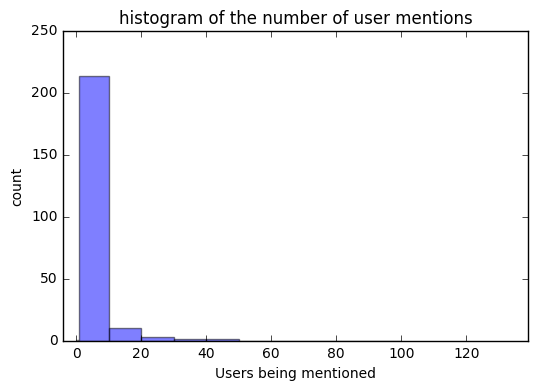

In [52]:
import numpy as np
import random
from matplotlib import pyplot as plt

bins=[0, 1, 10, 20, 30, 40, 50, 100]



# This is all the counts values of user mentions in the data, manually got from the above data
list = [2, 2, 2, 1, 1, 5, 2, 1, 2, 1, 2, 3, 1, 2, 1, 1, 8, 18, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 6, 1, 1, 1, 1, 2, 10, 41, 1, 2, 1, 1, 
        4, 1, 3, 1, 1, 1, 1, 1, 10, 7, 1, 1, 1, 13, 1, 1, 33, 1, 1, 1, 14, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 6, 1, 1, 
        2, 1, 1, 1, 1, 1, 4, 1, 2, 16, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 134, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 3, 12, 9, 1, 1, 3, 1, 
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 9, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 12, 3, 1, 
        2, 1, 1, 3, 1, 1, 1, 7, 1, 24, 1, 1, 2, 1, 1, 1, 6, 1, 3, 1, 2, 1, 6, 2, 15, 1, 4, 1, 1, 1, 1, 6, 2, 1, 7, 3, 3, 2, 2, 1, 1, 
        1, 1, 1, 1, 1, 9, 1, 2, 4, 1, 1, 2, 10, 1, 3, 1, 1, 1, 28, 21, 1, 8, 1, 1, 2, 2, 2]

plt.xlim([min(list)-5, max(list)+5])

plt.hist(list, bins=bins, alpha=0.5)
plt.title('histogram of the number of user mentions')
plt.xlabel('Users being mentioned')
plt.ylabel('count')
 
plt.show()




 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [4]:
import tweepy
from tweepy import Stream, OAuthHandler
from tweepy.streaming import StreamListener
from prettytable import PrettyTable

# Variables that contains the user credentials to access Twitter API. 
CONSUMER_KEY = 'TJbcvtJKeOLIC7VJ1P1ueD0Ex'
CONSUMER_SECRET ='Bt30IV0EXK4TOIkuonXEA8llQPW8IsFc8Hhh9y5lSGrWUjtRZv'
ACCESS_TOKEN = '776632770185596928-HleyQ6UtvVPWVcd19vdE8lMz48A3VoJ'
ACCESS_SECRET = 'ph1fjEuyT7ED7zNPoUTL3ZEJGqxRhJBRtAqEH5z7CZXHp'

auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth) 

# Provides a wrapper for the API as provided by Twitter.
      
if __name__ == "__main__":
    user_choose = "FinnJones"
    user = api.get_user(user_choose)
    print(user.screen_name)
  
    friends = api.friends_ids(user_choose) 
    followers = api.followers_ids(user_choose)
    
    print('Number of friends:', len(friends))
    print("Number of followers(Show 5000 if 5000+):", len(followers))
    
    # Get the first 20 id of friends/followers
    friend_list = friends[0:20]    
    follower_list = followers[0:20]
  
    # Plot 20 out of the friends
    user_choose_friends = PrettyTable(["user_id","screen_name"])
    for friends_id in (friend_list)[0:20]:
        user_choose_friends.add_row([friends_id, api.get_user(friends_id).screen_name] )
    print("user_choose_friends:")
    print(user_choose_friends)
  
    # Plot 20 out of the followers
    user_choose_follows = PrettyTable(["user_id","screen_name"])
    for follows_id in (follower_list)[0:20]:
        user_choose_follows.add_row([follows_id, api.get_user(follows_id).screen_name] )
    print("user_choose_follows:")
    print(user_choose_follows)
    
    api.get_user(friends_id).screen_name
mutual = set(friends).intersection(set(followers))
print("Mutual friend's set:")
print(mutual)

# Plot mutual friend's ID numbers and screen names in a table
mutual_friends = PrettyTable(["user_id","screen_name"])
for friends_id in mutual:
    mutual_friends.add_row([friends_id, api.get_user(friends_id).screen_name] )
    
    
print("mutual_friends:")
print(mutual_friends)

FinnJones
Number of friends: 192
Number of followers(Show 5000 if 5000+): 5000
user_choose_friends:
+------------+-----------------+
|  user_id   |   screen_name   |
+------------+-----------------+
|  74669397  |   billyeichner  |
| 110396781  |      ajplus     |
|  31323375  |  alexgibneyfilm |
| 2984679029 |     UR_Ninja    |
|  14982804  |       ava       |
| 1312306801 |  MarcoRamirezMD |
|  33654011  |      rizmc      |
|  16935292  |   democracynow  |
|  20479813  |     MMFlint     |
| 869825995  |    johnpilger   |
|  25917171  |  Krystenritter  |
| 2460379098 | Curtiscreationz |
|  82939583  |  rosariodawson  |
| 111216929  |   DrJillStein   |
| 2374127162 |     b_cogman    |
| 1694040764 |    xychelsea    |
| 2332443733 |    TIKIDISCO    |
| 147896437  | EssentialOilCom |
| 606776750  |  FreedomofPress |
| 112481670  |    broadcity    |
+------------+-----------------+
user_choose_follows:
+--------------------+-----------------+
|      user_id       |   screen_name   |
+----

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [2]:
#Our team collect information about Iron Fist on Twitter first and then figure out the source of those tweets 
#And also collect the information about the users who is more likely to be the potential audience of Iron Fist
#Finally, we discover the location of those users and find out how would Netflix focus on different areas.
inf = [ da['user']['location']
                 for da in iron]
label="Location"
pt = PrettyTable(field_names=[label, 'Count']) 
c = Counter(inf)
[ pt.add_row(kv) for kv in c.most_common()[:20] ]
pt.align[label], pt.align['Count'] = 'l', 'r' 
print(pt)


+----------------------+-------+
| Location             | Count |
+----------------------+-------+
| None                 |   284 |
| New York, NY         |    13 |
| United States        |    11 |
| Los Angeles, CA      |     9 |
| The end of the world |     9 |
| World                |     8 |
| Pittsford, NY        |     6 |
| London               |     6 |
| Central Florida      |     6 |
| USA                  |     6 |
| New York, USA        |     5 |
| India                |     5 |
| New York             |     5 |
| world                |     5 |
| Portland, OR         |     4 |
| London, England      |     4 |
| Everywhere           |     4 |
| Chicago              |     4 |
| San Mateo, CA        |     4 |
| France               |     4 |
+----------------------+-------+


# Results: summarize and visualize the results discovered from the analysis

The figure and tables are all in our PPT.


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 1".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (5 points) how well did the team describe the problem they are trying to solve using twitter data? 
       0: not clear
       1: I can barely understand the problem
       2: okay, can be improved
       3: good, but can be improved
       4: very good
       5: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection:
    ----------------------------------
    
    3. (10 points) Do you think the data collected are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale (> 300 tweets)
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    (1) Word Count (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular tweets in your collection of tweets: (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (3) Find popular twitter entities  (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    (4) Find user's followers and friends (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? 
       0: not relevant
       1: barely relevant to the problem
       2: okay solution, but there is an easier solution.
       3: good, but can be improved
       4: very good, but solution is simple/old
       5: innovative and technically sound
       
    7. how well did the team implement the solution in python? 
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think the results they found in the data? 
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  
       -1: I vote the other team is better than this team
        0: the same
        1: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9
       10: Team 10

